# MODEL TO DETECT EMOTION IN IMAGE

In [4]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#------------------------------
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
#------------------------------
#emotion classes in dataset
classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batchsize = 250
epochs = 5


with open("fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#declare train set and test set
x_train,y_train,x_test,y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
	    print("",end="")

#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



model = Sequential()
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(classes, activation='softmax'))

#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batchsize)


model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)
fit = True

if fit == True:
    #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batchsize, epochs=epochs)#train for randomly selected one
else:
	model.load_weights('facial_expression_model_weights.h5') #load weights
	

number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples
Epoch 1/5
250/250 [==============================] - 784s 3s/step - loss: 1.7305 - acc: 0.2933
Epoch 2/5
250/250 [==============================] - 800s 3s/step - loss: 1.4407 - acc: 0.4361
Epoch 3/5
250/250 [==============================] - 805s 3s/step - loss: 1.2765 - acc: 0.5091
Epoch 4/5
250/250 [==============================] - 805s 3s/step - loss: 1.1517 - acc: 0.5608
Epoch 5/5
250/250 [==============================] - 797s 3s/step - loss: 1.0501 - acc: 0.6028


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         147584    
__________

# Evaluate the model on test and training data

In [4]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 1.17479547935
Train accuracy: 55.0872548678
Test loss: 1.27389445807
Test accuracy: 51.5463917534


In [6]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=250, verbose=1)

Train on 22967 samples, validate on 5742 samples
Epoch 1/5
22967/22967 [==============================] - 285s 12ms/step - loss: 1.1658 - acc: 0.5551 - val_loss: 1.1265 - val_acc: 0.5778
Epoch 2/5
22967/22967 [==============================] - 275s 12ms/step - loss: 1.1324 - acc: 0.5711 - val_loss: 1.1144 - val_acc: 0.5785
Epoch 3/5
22967/22967 [==============================] - 276s 12ms/step - loss: 1.0965 - acc: 0.5854 - val_loss: 1.1262 - val_acc: 0.5759
Epoch 4/5
22967/22967 [==============================] - 276s 12ms/step - loss: 1.0717 - acc: 0.5945 - val_loss: 1.1282 - val_acc: 0.5789
Epoch 5/5
22967/22967 [==============================] - 276s 12ms/step - loss: 1.0379 - acc: 0.6088 - val_loss: 1.1301 - val_acc: 0.5759


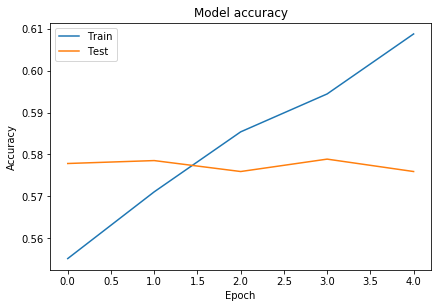

In [13]:
# Accuracy and validation plots
plt.figure(figsize=(15, 10))
plt.subplot(221)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

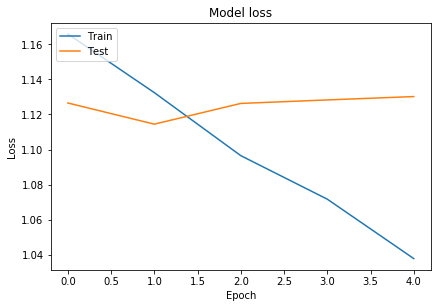

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [4]:
predictions = model.predict(x_test)

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions:
 
 pred_list.append(np.argmax(i))
 
for i in y_test:
 
 actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[184,   0,  23,  51, 105,  18,  86],
       [ 27,   2,   7,   4,  11,   0,   5],
       [ 43,   2,  85,  51, 138,  74, 103],
       [ 19,   0,  26, 696,  51,  21,  82],
       [ 56,   0,  48,  73, 299,  10, 167],
       [  8,   0,  38,  24,  20, 306,  19],
       [ 39,   0,  33,  76, 127,   7, 325]], dtype=int64)

In [8]:
 #objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
objects = ('frustrated', 'bored', 'anxiety', 'amused', 'confused', 'excited', 'engaged')

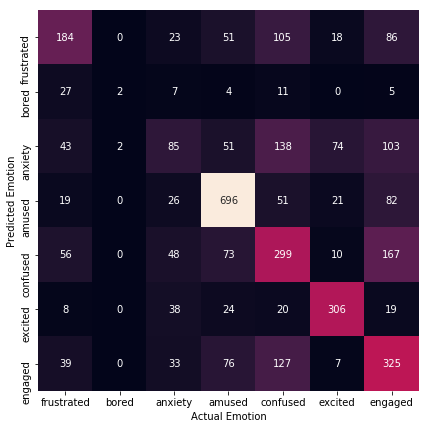

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(actual_list, pred_list)
plt.figure(figsize=(7, 7))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=objects, yticklabels=objects)
plt.xlabel('Actual Emotion')
plt.ylabel('Predicted Emotion');
plt.show()

In [11]:
def emotion_analysis(emotions):
 
    #objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    objects = ('frustrated', 'bored', 'anxiety', 'amused', 'confused', 'engaged', 'neutral')
    y_pos = np.arange(len(objects))
 
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
 
    plt.show()

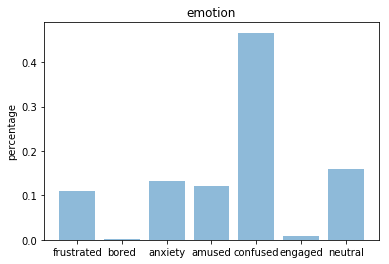

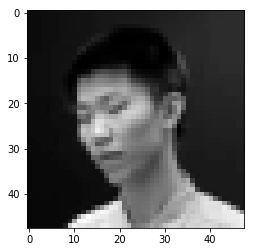

In [23]:
from keras.preprocessing import image
img = image.load_img("/videoframes/test/frame_stephen.jpg", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
 
custom = model.predict(x)
emotion_analysis(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

# Model to generate architecture diagram of model

In [5]:
# Models under ":C:\Users\ANDRES\Anaconda3\Lib\site-packages"
# file keras_util and folder keras_models
from keras_util import convert_drawer_model
from keras_models import AlexNet
keras_sequential_model = AlexNet.get_model()
model = convert_drawer_model(keras_sequential_model)

model.save_fig("example.svg")

# USE MODEL TO DETECT EMOTION IN VIDEO

In [ ]:
import numpy as np
import cv2
from keras.preprocessing import image


#initialize opencv
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('/videos/Kopi,Band,8.mp4',0)

#face recognition from saved model above
from keras.models import model_from_json
model = model_from_json(open("facial_expression_model_structure.json", "r").read())
model.load_weights('facial_expression_model_weights.h5') #load weights

#-----------------------------
emotions = ('frustrated', 'bored', 'anxiety', 'amused', 'confused', 'engaged', 'neutral')

while(True):
	ret, img = cap.read()
	

	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	faces = face_cascade.detectMultiScale(gray, 1.3, 5)

	#print(faces) #locations of detected faces

	for (x,y,w,h) in faces:
		cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
		
		detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
		detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
		detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48
		
		img_pixels = image.img_to_array(detected_face)
		img_pixels = np.expand_dims(img_pixels, axis = 0)
		
		img_pixels /= 255 #pixels are in scale of [0, 255]. normalize all pixels in scale of [0, 1]
		
		predictions = model.predict(img_pixels) #store the probability of the emotions in an array
		
		#find max indexed array 0: angry, 1:disgust, 2:fear, 3:happy, 4:sad, 5:surprise, 6:neutral
		max_index = np.argmax(predictions[0])
		
		emotion = emotions[max_index]
		
		#write the detected emotion above the face
		cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
		
		
	cv2.imshow('img',img)

	if cv2.waitKey(1) & 0xFF == ord('q'): #press q to quit
		break

#kill open cv things		
cap.release()
cv2.destroyAllWindows()

Using TensorFlow backend.
